# Task 4.10 PART 1 of 2

# Table Of Contents

## 1. Data Import
## 2. PII Data Security Implications
## 3. Customer Behavior per Geographical Area
## 4. Identifying Low Activity Customers
## 5. Customer Profiling for Marketing Strategies
## 6. Distribution of Customer Profiles Visualization
## 7. Profiles Usage Frequency and Expenditure
## 8. Customer Comparison via Regions and Departments

# 1. Data Import

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r'C:\Users\asus\Instacart Basket Analysis 01-2024'

In [3]:
# import datafgrame from previous Task
IC_full_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

# 2. PII Data Security Implications


In [4]:
#check types of columns

IC_full_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 int32         
 1   First Name              object        
 2   Surname                 object        
 3   Gender                  object        
 4   State                   object        
 5   Age                     int64         
 6   Date_joined             datetime64[ns]
 7   Dependants              int64         
 8   Family_status           object        
 9   income                  int64         
 10  product_id              int64         
 11  product_name            object        
 12  aisle_id                int64         
 13  department_id           int64         
 14  prices                  float64       
 15  order_id                int32         
 16  order_number            int8          
 17  orders_day_of_week      int8          
 18  

This particular dataframe contains PII related information. It contains First and last name, gender, which state the customer lives in, how many dependants, age, and income. 

# 3. Customer Behavior per Geographical Area

Creating US regions where states are divided into regions

In [5]:
# create a Northeast region

IC_full_merge.loc[(IC_full_merge['State']=='Maine') | 
              (IC_full_merge['State']=='New Hampshire')|
              (IC_full_merge['State']=='Vermont') |
              (IC_full_merge['State']=='Massachusetts') |
              (IC_full_merge['State']=='Rhode Island') |
              (IC_full_merge['State']=='Connecticut')|
              (IC_full_merge['State']=='New York')|
              (IC_full_merge['State']=='Pennsylvania')|
              (IC_full_merge['State']=='New Jersey') , 'region']='Northeast'

In [6]:
# create a Midwest region

IC_full_merge.loc[(IC_full_merge['State']=='Wisconsin') | 
              (IC_full_merge['State']=='Michigan')|
              (IC_full_merge['State']=='Illinois') |
              (IC_full_merge['State']=='Indiana') |
              (IC_full_merge['State']=='Ohio') |
              (IC_full_merge['State']=='North Dakota')|
              (IC_full_merge['State']=='South Dakota')|
              (IC_full_merge['State']=='Nebraska')|
              (IC_full_merge['State']=='Kansas')|
              (IC_full_merge['State']=='Minnesota')|
              (IC_full_merge['State']=='Iowa')|
              (IC_full_merge['State']=='Missouri') , 'region']='Midwest'

In [7]:
# create a South region

IC_full_merge.loc[(IC_full_merge['State']=='Delaware')|
              (IC_full_merge['State']=='Maryland')|
              (IC_full_merge['State']=='District of Columbia')|
              (IC_full_merge['State']=='Virginia')|
              (IC_full_merge['State']=='West Virginia')|
              (IC_full_merge['State']=='North Carolina')|
              (IC_full_merge['State']=='South Carolina')|
              (IC_full_merge['State']=='Georgia')|
              (IC_full_merge['State']=='Florida')|
              (IC_full_merge['State']=='Kentucky')|
              (IC_full_merge['State']=='Tennessee')|
              (IC_full_merge['State']=='Mississippi')|
              (IC_full_merge['State']=='Alabama')|
              (IC_full_merge['State']=='Oklahoma')|
              (IC_full_merge['State']=='Texas')|
              (IC_full_merge['State']=='Arkansas')|
              (IC_full_merge['State']=='Louisiana'), 'region']='South'

In [8]:
# create a West region

IC_full_merge.loc[(IC_full_merge['State']=='Idaho')|
              (IC_full_merge['State']=='Montana')|
              (IC_full_merge['State']=='Wyoming')|
              (IC_full_merge['State']=='Nevada')|
              (IC_full_merge['State']=='Utah')|
              (IC_full_merge['State']=='Colorado')|
              (IC_full_merge['State']=='Arizona')|
              (IC_full_merge['State']=='New Mexico')|
              (IC_full_merge['State']=='Alaska')|
              (IC_full_merge['State']=='Washington')|
              (IC_full_merge['State']=='Oregon')|
              (IC_full_merge['State']=='California')|
              (IC_full_merge['State']=='Hawaii'), 'region']='West'

In [9]:
# value counts by regions
IC_full_merge['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [10]:
# value counts according to spender type in 'region' column

IC_full_merge['spender_flag'].value_counts(dropna=False)

spender_flag
low spender     31770614
high spender      634245
Name: count, dtype: int64

In [11]:
# crossing the variable region with the spender_flag 

crosstab = pd.crosstab(IC_full_merge['region'], IC_full_merge['spender_flag'], dropna = False)

In [12]:
crosstab

spender_flag,high spender,low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [13]:
# export crossing data to excel
crosstab.to_clipboard()

Excel Sheet Final Data Spending Habits:

region	    high spender  low spender	total spenders	% high spenders	% low spenders	 % of spenders per region
Midwest	    155,975	      7,441,350	      7,597,325	      2.05	           97.95	         23.45
Northeast	108,225	      5,614,511	      5,722,736	      1.89	           98.11	         17.66
South	    209,691	      10,582,194	  10,791,885	  1.94	           98.06	         33.30
West	    160,354	      8,132,559	      8,292,913	      1.93	           98.07	         25.59
                                  TOTAL:  32,404,859			


FINDINGS:
1. The South region has the highest percentage of total spenders overall in the US
2. The Midwest region has the highest percentage of high spenders in the US
3. The Northeast region has the highest percentage of low spenders in the US
4. The Northeast regioan has the lowest percentage of high spenders in the US
5. The Midwest has the lowest percentage of low spenders in the US


# 4. Identifying Low Activity Customers

In [14]:
# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data


IC_full_merge.loc[IC_full_merge['max_order']<5,'exclusion_flag']='low_activity_cust'

In [15]:
# check exclusion flag

IC_full_merge['exclusion_flag'].value_counts(dropna=False)

exclusion_flag
nan                  30964564
low_activity_cust     1440295
Name: count, dtype: int64

In [16]:
# check shape

IC_full_merge.shape

(32404859, 35)

In [17]:
# create new dataframe excluding low activity customers

IC_full_merge2=IC_full_merge[IC_full_merge['exclusion_flag'] !='low_activity_cust']

In [18]:
# check value counts on exclusion flag

IC_full_merge2['exclusion_flag'].value_counts()

exclusion_flag
nan    30964564
Name: count, dtype: int64

In [19]:
# check shape of new dataframe IC_full_merge2


IC_full_merge2.shape

(30964564, 35)

In [20]:
#export the new data frame excluding low-activity customers. 


IC_full_merge2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'IC_full_merge2.pkl'))

# 5, 6, 7 and 8 Customer Profiling and Comparisons for Marketing Strategies

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## Profiling Age

In [21]:
IC_full_merge2['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [23]:
# create an age_group based on ages from 0 to 33 

IC_full_merge2.loc[IC_full_merge2['Age'] <33, 'age_group'] = 'Young Adult'

In [24]:
# create an age_group based on ages from 33 to 65 

IC_full_merge2.loc[(IC_full_merge['Age']>=33) & (IC_full_merge['Age']<65),'age_group']= 'Adult'

In [25]:
# create an age_group based on ages from 65 and up

IC_full_merge2.loc[IC_full_merge['Age']>=65,'age_group']= 'Senior Adult'

In [26]:
# check the value count

IC_full_merge2['age_group'].value_counts(dropna=False)

age_group
Adult           15483886
Senior Adult     8195544
Young Adult      7285134
Name: count, dtype: int64

In [27]:
# check value counts of Age

IC_full_merge2['Age'].value_counts(dropna=False)

Age
79    508337
49    507879
48    506730
31    506218
64    504832
       ...  
60    461897
36    460649
66    454604
41    451269
25    449324
Name: count, Length: 64, dtype: int64

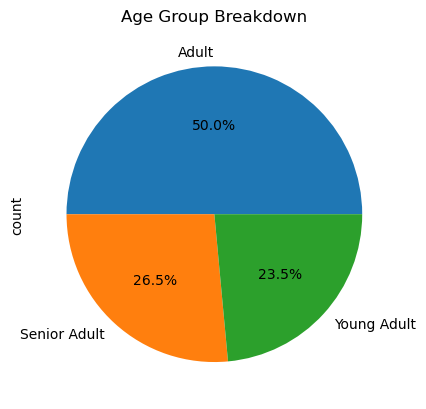

In [126]:
#visualization of Age flag 'age_group'


pie_age_group = IC_full_merge2['age_group'].value_counts().plot.pie(autopct='%1.1f%%', title='Age Group Breakdown')

In [127]:
# export image

pie_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_breakdown_pie.png'))

In [29]:
# crossing the variable region with the 'age_group' flag


crosstab = pd.crosstab(IC_full_merge2['region'], IC_full_merge2['age_group'], dropna = False)

In [30]:
crosstab

age_group,Adult,Senior Adult,Young Adult
region,,,
Midwest,3671513,1904046,1685954
Northeast,2689723,1484807,1290155
South,5153310,2708461,2449368
West,3969340,2098230,1859657


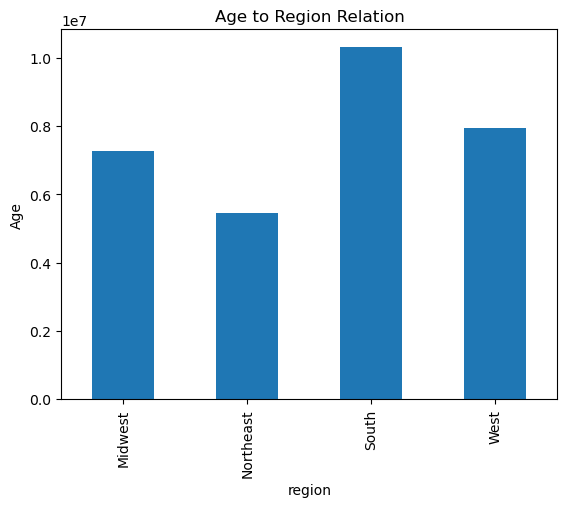

In [31]:
# creating a bar chart to visualize age to region


plt.title('Age to Region Relation')
plt.ylabel('Age')
plt.xlabel('region')
age_per_region = IC_full_merge2['region'].value_counts().sort_index().plot.bar()

In [88]:
# export image

age_per_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_breakdown_bar.png'))

Text(0, 0.5, 'Qty')

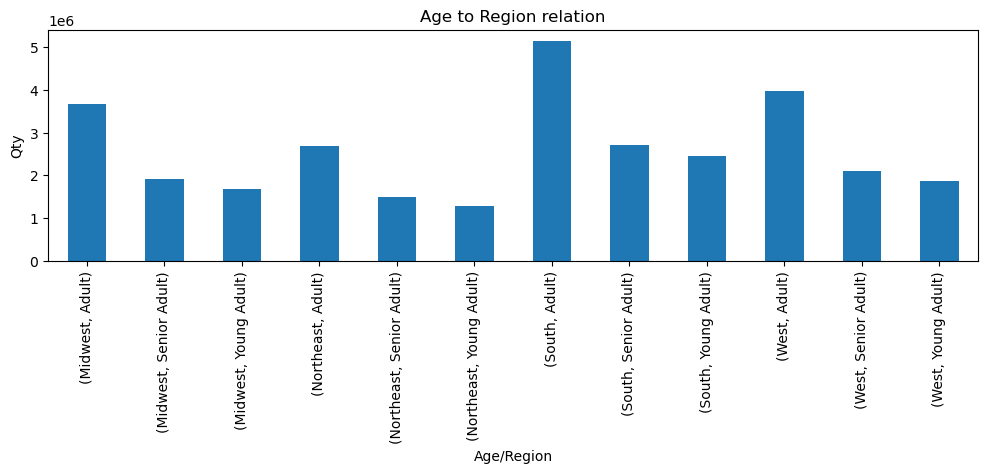

In [124]:
# creating bar chart to see age to region relation


plt.figure(figsize=(12, 3))
age_per_region2 = IC_full_merge2[['region', 'age_group']].value_counts().sort_index().plot.bar()
plt.title('Age to Region relation')
plt.xlabel('Age/Region')
plt.ylabel('Qty')

In [125]:
# export image

age_per_region2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_per_region2_bar.png'))

In [33]:
# stack bar DB for age


sb = IC_full_merge2.groupby('region')['age_group'].value_counts()

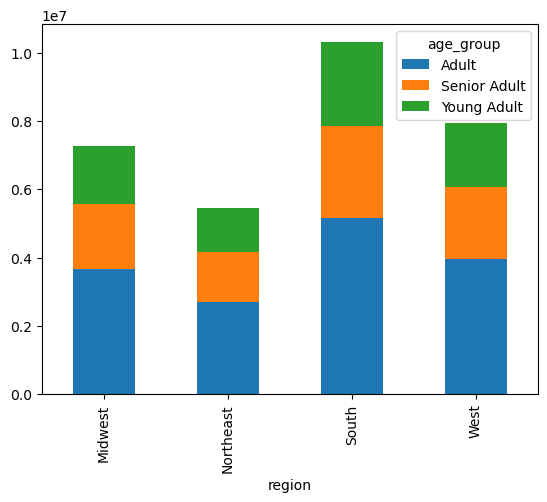

In [34]:
# group by age and region with a stack bar

stackbar=sb.unstack().plot.bar(stacked=True)

In [92]:
# export image

stackbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_to_region_stackbar.png'))

### OBSERVATIONS:

1. The South has the highest number of Adults and the Norhteast has the lowest number.
2. The South has the higest number of Young Adults adn the Northeast has the lowest number.
3. The South hs the highest number of Senior Adults and the Northeast region has the lowest.
4. The South clearly has the largest amount of customers per capita overall and the Northeast has the lowest per capita overall.
5. Special focus can be given to the South when launching new products given the fact they have the largest population per capita of the whole US and their reaction to a new product(s) could be sued as framework to see which products sell the most off the gate.  


## Profiling Income

In [35]:
IC_full_merge2['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [37]:
# create income_level column based on income less than 67292

IC_full_merge2.loc[IC_full_merge2['income']<67292,'income_level']= 'Low income'

In [38]:
# create income_level column based on income between 67292 and 128102

IC_full_merge2.loc[(IC_full_merge2['income']>=67292) & (IC_full_merge2['income']<128102),'income_level']= 'Median income'

In [39]:
# create income_level column based on income greater than 128102

IC_full_merge2.loc[IC_full_merge2['income']>=128102,'income_level']= 'High income'

In [40]:
# check the value count

IC_full_merge2['income_level'].value_counts()

income_level
Median income    15482298
High income       7741261
Low income        7741005
Name: count, dtype: int64

In [41]:
# check the shape

IC_full_merge2['income_level'].shape

(30964564,)

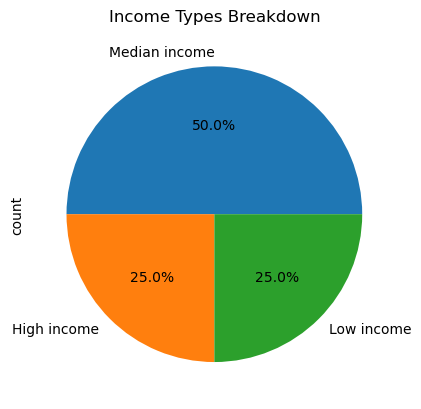

In [42]:
# create a pie cart to check income levels

pie_income_level = IC_full_merge2['income_level'].value_counts().plot.pie(autopct='%1.1f%%', title='Income Types Breakdown')

In [93]:
# export image

pie_income_level.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_level_pie.png'))

In [43]:
# create a crosstab of income_leve3l with region

crosstab = pd.crosstab(IC_full_merge2['region'], IC_full_merge2['income_level'], dropna = False)

In [44]:
crosstab

income_level,High income,Low income,Median income
region,,,
Midwest,1841900,1790670,3628943
Northeast,1372838,1367074,2724773
South,2549267,2593220,5168652
West,1977256,1990041,3959930


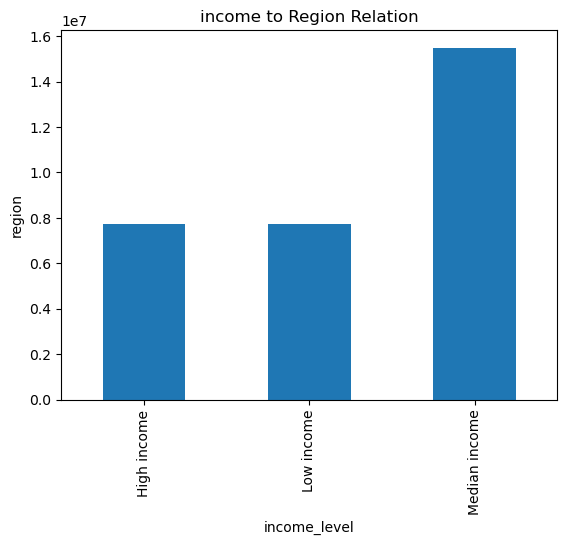

In [45]:
# creating a bar chart to visualize income to region

plt.title('income to Region Relation')
plt.ylabel('region')
plt.xlabel('income_level')
income_per_region = IC_full_merge2['income_level'].value_counts().sort_index().plot.bar()

In [94]:
# export image

income_per_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_per_region_bar.png'))

Text(0, 0.5, 'Qty')

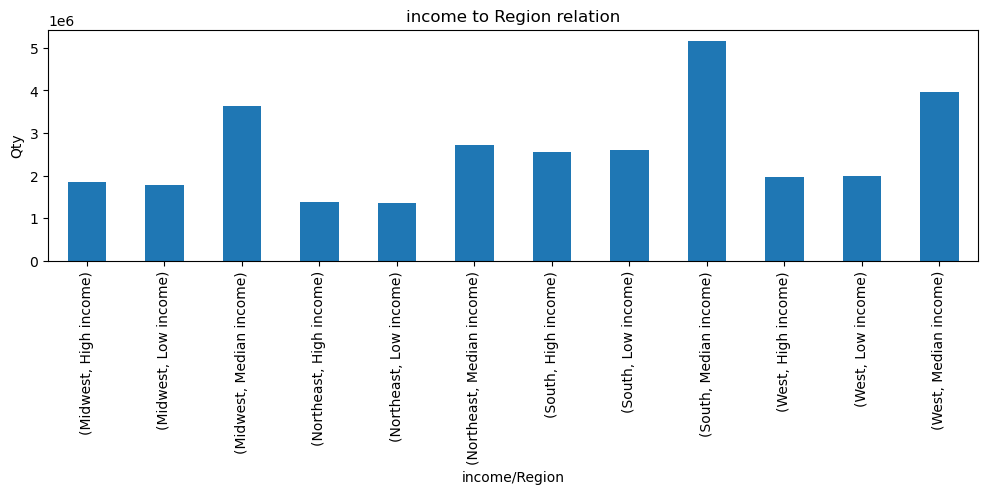

In [96]:
# creating bar chart to see income to region relation


plt.figure(figsize=(12, 3))
income_per_region2 = IC_full_merge2[['region', 'income_level']].value_counts().sort_index().plot.bar()
plt.title('income to Region relation')
plt.xlabel('income/Region')
plt.ylabel('Qty')

In [97]:
# export image

income_per_region2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_per_region2_bar.png'))

In [100]:
# stack bar DB for income


sb2 = IC_full_merge2.groupby('region')['income_level'].value_counts()

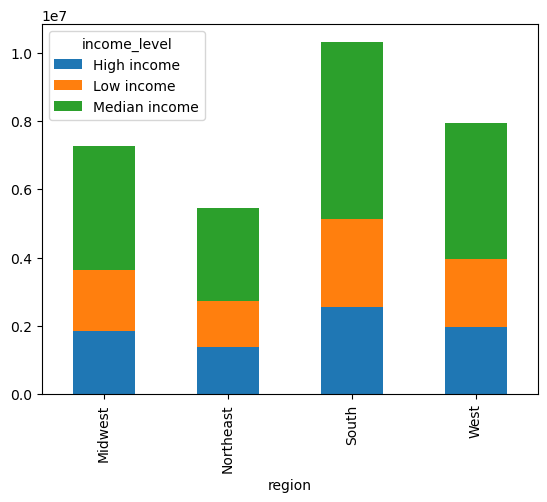

In [101]:
# group by income and region with a stack bar

stackbar2=sb2.unstack().plot.bar(stacked=True)

In [102]:
# export image

stackbar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_to_region_stackbar.png'))

### OBSERVATIONS:

1. The South has the highest Median Income of all 4 regions and the Northeast has the lowest.
2. The South has the highest High Income and the Northeast has the lowest.
3. The South hs the highest Low Income and the Northeast region has the lowest.
4. The South clearly has the highest levels of incomes in all three categories per capita, and the Northeast has the lowest per capita overall.
5. Special focus should be given to the South region when launching new products or new campaigns and gauge the overall purchasing reactions to the products, and generate predictions and selling trends by how the new products will sell in the South.  

## Profiling Number of Dependants

In [50]:
IC_full_merge2['Dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: Dependants, dtype: float64

In [52]:
# create dependants_qty column based on 1 dependant

IC_full_merge2.loc[IC_full_merge2['Dependants'] == 1, 'dependants_qty'] = 1

In [53]:
# create a dependants_qty column based on 2 dependants

IC_full_merge2.loc[IC_full_merge2['Dependants'] == 2, 'dependants_qty'] = 2

In [54]:
# create a dependants_qty column based on 3 dependants

IC_full_merge2.loc[IC_full_merge2['Dependants'] == 3, 'dependants_qty'] = 3

In [55]:
# check the value count

IC_full_merge2['dependants_qty'].value_counts()

dependants_qty
3.0    7772516
2.0    7733261
1.0    7719106
Name: count, dtype: int64

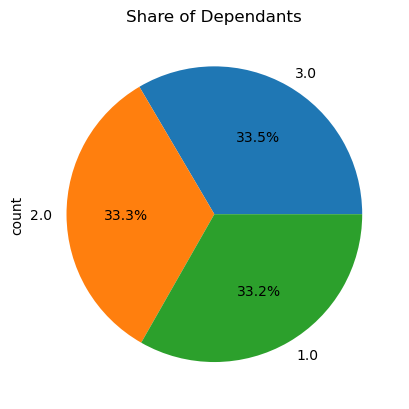

In [103]:
# create pie chart to check number of dependants

pie_dependants_qty = IC_full_merge2['dependants_qty'].value_counts().plot.pie(autopct='%1.1f%%', title='Share of Dependants')

In [104]:
# export image

pie_dependants_qty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_qty_pie.png'))

In [57]:
# create a crosstab of number of dependants with region

crosstab = pd.crosstab(IC_full_merge2['region'], IC_full_merge2['dependants_qty'], dropna = False)

In [58]:
crosstab

dependants_qty,1.0,2.0,3.0,NaN
region,,,,
Midwest,1841417,1809994,1787286,1822816
Northeast,1377009,1351961,1381233,1354482
South,2539625,2603717,2585864,2581933
West,1961055,1967589,2018133,1980450


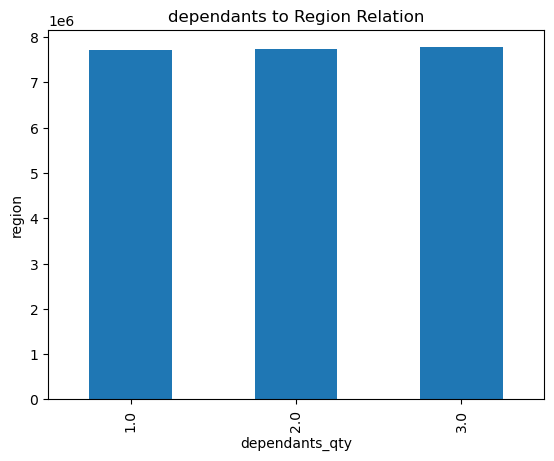

In [107]:
# creating a bar chart to visualize number of dependants to region

plt.title('dependants to Region Relation')
plt.ylabel('region')
plt.xlabel('dependants_qty')
dependants_per_region = IC_full_merge2['dependants_qty'].value_counts().sort_index().plot.bar()

In [108]:
# export image

dependants_per_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_per_region_bar.png'))

Text(0, 0.5, 'Qty')

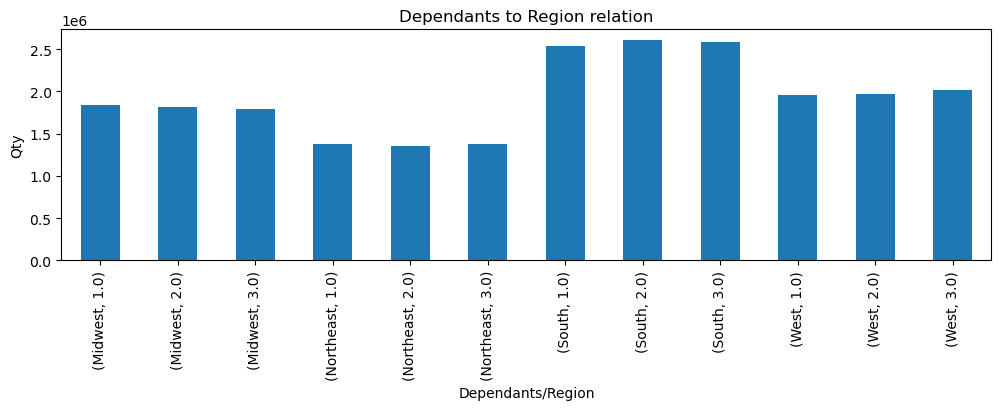

In [109]:
# creating bar chart to see number of dependants to region relation


plt.figure(figsize=(12, 3))
dependants_per_region2 = IC_full_merge2[['region', 'dependants_qty']].value_counts().sort_index().plot.bar()
plt.title('Dependants to Region relation')
plt.xlabel('Dependants/Region')
plt.ylabel('Qty')

In [110]:
# export image

dependants_per_region2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_per_region2_bar.png'))

In [65]:
# stack bar DB for number of dependants

sb3 = IC_full_merge2.groupby('region')['dependants_qty'].value_counts()

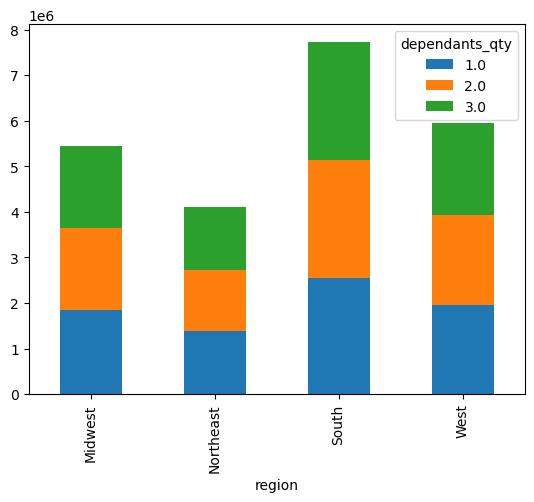

In [111]:
# group by number of dependants and region with a stack bar

stackbar3=sb3.unstack().plot.bar(stacked=True)

In [112]:
# export image

stackbar3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_per_region_stackbar.png'))

### OBSERVATIONS:

1. The South has the highest number of Dependants overall of all 4 regions and the Northeast has the lowest.
2. The South clearly has the highest number of dependants overall in all four region categories per capita, and the Northeast has the lowest per capita overall.
5. The South should be a special marketing target for Instacart when it comes to infant/children items regardless of them being high ticket or average price.

## Profiling Department id goods

In [67]:
IC_full_merge2['department_id'].describe()

count    3.096456e+07
mean     9.922365e+00
std      6.282441e+00
min      1.000000e+00
25%      4.000000e+00
50%      9.000000e+00
75%      1.600000e+01
max      2.100000e+01
Name: department_id, dtype: float64

In [68]:
# create a profiling table in reference for aggregation 

IC_full_merge2.loc[:,["product_name", "department_id", "orders_day_of_week"]]

,product_name,department_id,orders_day_of_week
0,Soda,7,1
1,Soda,7,5
2,Soda,7,1
3,Clementines,4,2
4,Clementines,4,3
...,...,...,...
32404813,Fresh Mint Toothpaste,11,0
32404814,Fresh Mint Toothpaste,11,5
32404815,Fresh Mint Toothpaste,11,6
32404816,Favorites Super Moist Butter Recipe Yellow Cak...,13,6


In [69]:
# checking the aggregate of max, mean, and min variables on depratment id vs order of the week

IC_full_merge2.groupby('department_id').agg({'orders_day_of_week': ['mean', 'min', 'max']})

orders_day_of_week        
                            mean min max
department_id                           
1                       2.792869   0   6
2                       2.853012   0   6
3                       2.745236   0   6
4                       2.687693   0   6
5                       3.165253   0   6
6                       2.692466   0   6
7                       2.807342   0   6
8                       2.934730   0   6
9                       2.693114   0   6
10                      2.761532   0   6
11                      2.817910   0   6
12                      2.720062   0   6
13                      2.812745   0   6
14                      2.733453   0   6
15                      2.710028   0   6
16                      2.742587   0   6
17                      2.835935   0   6
18                      2.713160   0   6
19                      2.753274   0   6
20                      2.708570   0   6
21                      2.804008   0   6

In [70]:
# checking value counts of orders_day_of_week

IC_full_merge2['orders_day_of_week'].value_counts()

orders_day_of_week
0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: count, dtype: int64

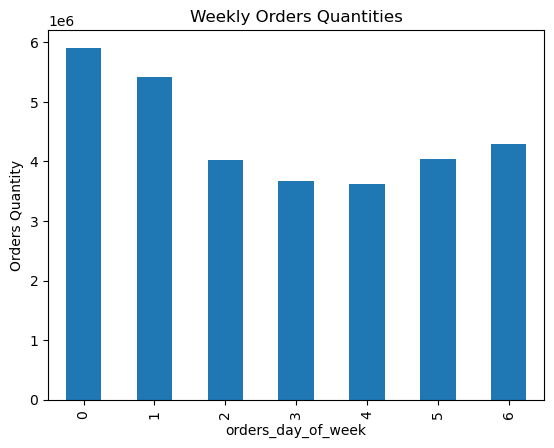

In [71]:
# creating a bar chart to visualize orders per day of the week

plt.title('Weekly Orders Quantities')
plt.ylabel('Orders Quantity')
plt.xlabel('Orders day of week')
weekly_orders = IC_full_merge2['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [113]:
# export image

weekly_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'weekly_orders_bar.png'))

Text(0, 0.5, 'qty')

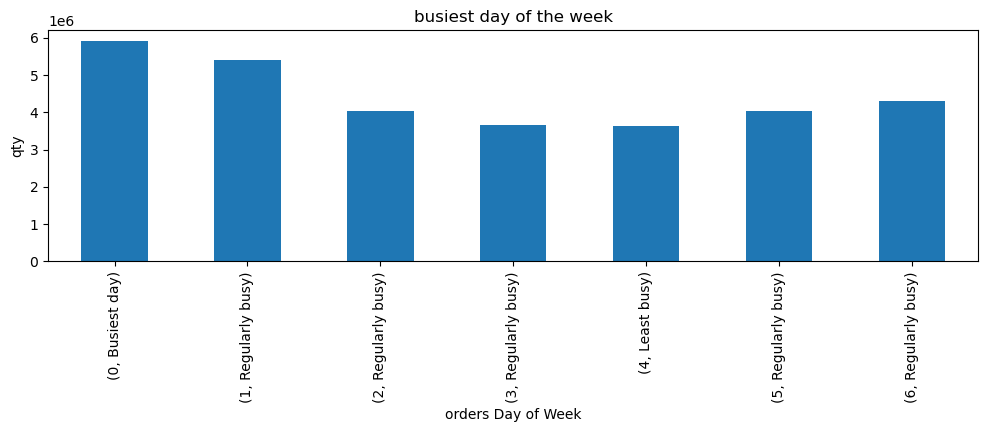

In [114]:
# creating bar chart to see busiest day for orders


plt.figure(figsize=(12, 3))
busiest_day = IC_full_merge2[['orders_day_of_week', 'busiest_day']].value_counts().sort_index().plot.bar()
plt.title('busiest day of the week')
plt.xlabel('orders Day of Week')
plt.ylabel('qty')

In [115]:
# export image

busiest_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_day_bar.png'))

In [116]:
# stack bar DB for busiest day of the week according to orders

sb4 = IC_full_merge2.groupby('orders_day_of_week')['busiest_day'].value_counts()

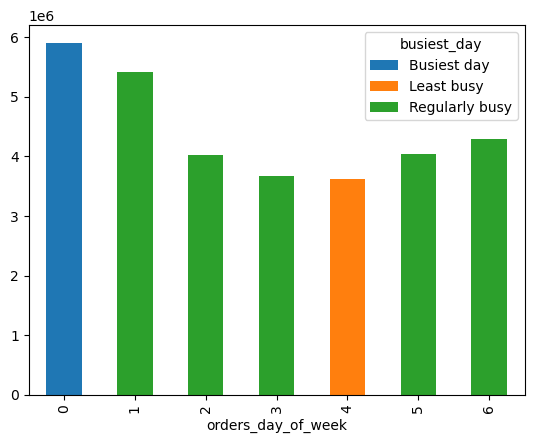

In [117]:
# group by busiest day of the week according to orders

stackbar4=sb4.unstack().plot.bar(stacked=True)

In [118]:
# export image

stackbar4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_day_stackbar.png'))

Text(0, 0.5, 'qty')

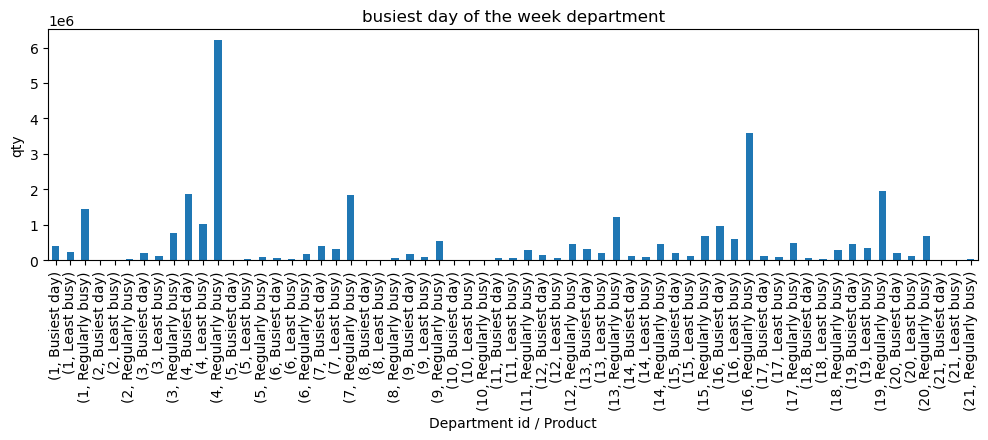

In [119]:
# creating bar chart to see which department sees most activity in the week


plt.figure(figsize=(12, 3))
busiest_day_department = IC_full_merge2[['department_id', 'busiest_day']].value_counts().sort_index().plot.bar()
plt.title('busiest day of the week department')
plt.xlabel('Department id / Product')
plt.ylabel('qty')

In [120]:
# export image

busiest_day_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_day_department_bar.png'))

In [121]:
# stack bar DB for busiest day of the week department according to orders

sb5 = IC_full_merge2.groupby('department_id')['busiest_day'].value_counts()

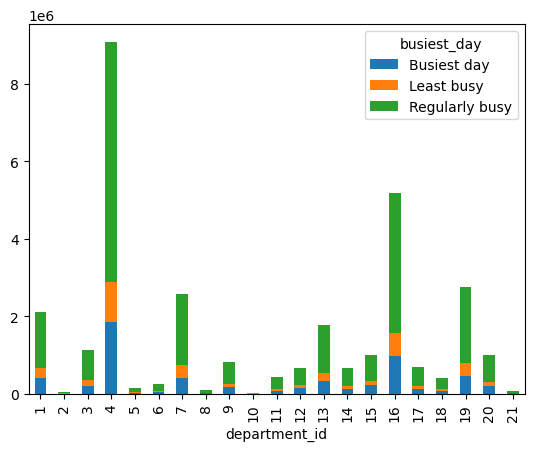

In [122]:
# group by which department is busiest during the week

stackbar5=sb5.unstack().plot.bar(stacked=True)

In [123]:
# export image

stackbar5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_day_department_stackbar.png'))

### OBSERVATIONS

1. Saturday is by far the busiest sales day for Instacart, while Wednesday is the slowest in the week.
2. Sunday is the second busiest sales day for Instacart, while Monday, Thursday and Friday are the steadiest...showing almost equal numbers.
3. Department 4 is the department with the most activity per week, followed by Department 16 
4. Department 10 is the department with the least activity per week, followed closely by Department 2.
5. We can infer by looking at the department information and orders of the day that: Department 4 on Saturdays is the departmet that generates the most income weekly...while the opposite of that being Department 10 on Wednesdays has the lowest amount of orders/sales. 
6. The South region has the highest number of customers accross ages and income levels so we can deduct that that the South region drives sales orders the most on Saturday, while the Northeast drives the least of the sales orders. 

